kappa:  0.1
[7.75690525173116, 9.398675749918272, 6.449274413004128, 4.032019185736516, 2.7520497665369303, 1.9546921505483843, 1.4776339101459761, 1.1366232536937548, 0.9608645234639364, 0.7443422740805915, 0.616612378841547, 0.5183392007235061, 0.40982785120835213, 0.33605446826122126, 0.28349945467201826, 0.22613133826090293, 0.18208622492752852, 0.14620883420286707, 0.11950863415340308, 0.09242228785081341]


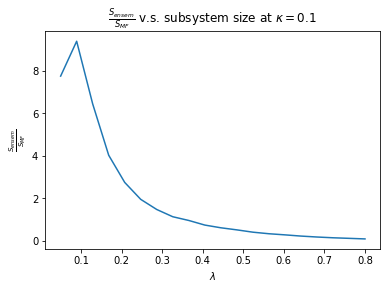

kappa:  0.2
[3.511761895408528, 3.614153064792216, 3.78891981178058, 4.343202994727494, 4.66441480823258, 3.153099484046926, 2.3176462102380717, 1.7286203988592066, 1.3970385402540149, 1.0868256428452312, 0.8946243352043233, 0.7177327510459568, 0.6133222948957007, 0.489418380813568, 0.4041567539576637, 0.3215266505457613, 0.2705934395368153, 0.2080321919944809, 0.15893255330677478, 0.12393562137226126]


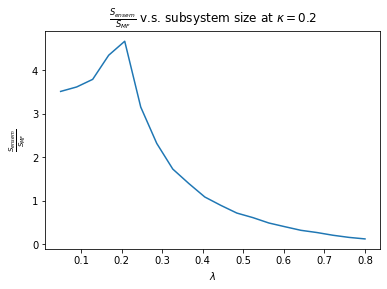

kappa:  0.30000000000000004
[2.0405894592182667, 2.239492083362164, 2.232409884580146, 2.3999222973597965, 2.5146307676766972, 2.768979792124456, 3.1084648446796277, 2.7274165680264337, 1.9540197281953042, 1.5381808322108934, 1.2478043451468177, 0.995414605408736, 0.8049455975485276, 0.6588017688411846, 0.5161475505619644, 0.435382038379012, 0.3441987264084886, 0.27660421784615424, 0.21224799110309636, 0.16830179899055772]


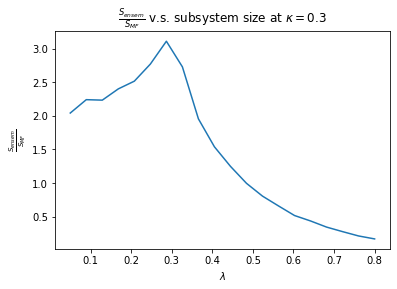

kappa:  0.4
[1.432911603025222, 1.42578939863336, 1.5350823383301724, 1.6081979269693356, 1.6566078082165785, 1.7646675111337127, 1.8745698888760611, 2.0060202624021812, 2.174529439077549, 2.3752881539334325, 1.8087000306503178, 1.4251669461212428, 1.128151573074444, 0.8680528024609674, 0.7084293731222405, 0.5842454388365415, 0.4603863271921558, 0.35649600166202106, 0.29105215679927027, 0.224660144819212]


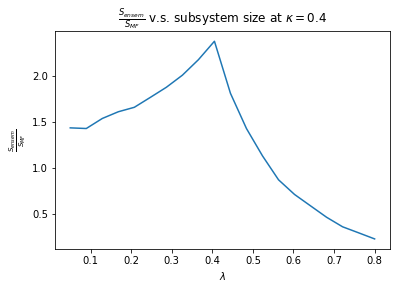

kappa:  0.5
[1.0031752480928868, 1.0513062657441519, 1.100646238355545, 1.1254323084482432, 1.1784560252569982, 1.2389099614633472, 1.2859080622987384, 1.352954389193614, 1.4251524298665457, 1.5701374092700315, 1.6600354199774703, 1.8212979262355482, 1.679453315922132, 1.2823802046862178, 1.0084662746896984, 0.810172695153237, 0.6374426081459823, 0.5003270881020068, 0.3954190264569724, 0.2919595069242907]


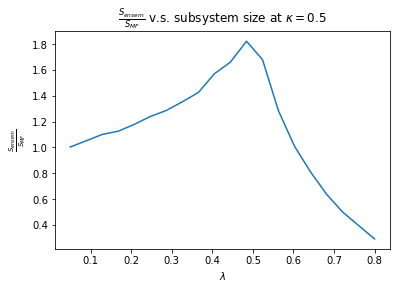

kappa:  0.6000000000000001
[0.7759925097432424, 0.780546644654814, 0.7858577966250914, 0.8380500942631348, 0.8851493475745644, 0.8941498528818885, 0.9460263404164972, 0.9968143115923944, 1.0218620543719183, 1.0578526799417975, 1.1306005554304126, 1.2030865426969741, 1.305710721925067, 1.439819748796317, 1.6538557595722172, 1.20500746055973, 0.907792693643408, 0.7241102890220797, 0.5422378104267704, 0.40976653395829465]


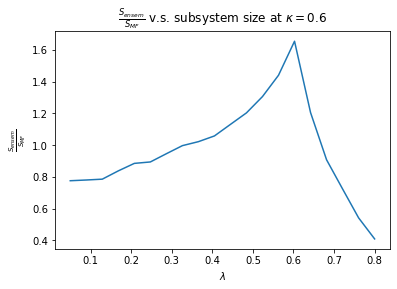

kappa:  0.7000000000000001
[0.6317307280775957, 0.601756588826107, 0.6117240957772822, 0.6454492348834161, 0.6549277536498518, 0.7011465483020434, 0.7047188117626465, 0.7482845611384563, 0.7293570883929689, 0.783007752626887, 0.8301993923005905, 0.8684076420536581, 0.9125022517192858, 0.9639121482841673, 1.0082896394382201, 1.1258848642188668, 1.3126169987573708, 1.1409569482034867, 0.8599006560834251, 0.6271441399633274]


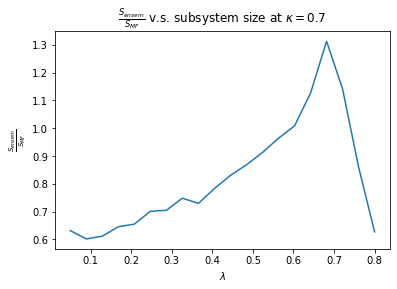

In [3]:
#Test the small-lambda limit of the entropy of the Jacobi ensemble.
#At small lambda, S from Jacobi ensemble should agree with the mean field entropy.
#HOWEVER, this does not seem to be true in general.

import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle



def generateC(m1,m2,m):
    A = np.array((np.random.normal(0, 1, m1*m)+1j*np.random.normal(0, 1, m1*m))).reshape((m1,m))/2**0.5
    B = np.array((np.random.normal(0, 1, m2*m)+1j*np.random.normal(0, 1, m2*m))).reshape((m2,m))/2**0.5
    sqrtAB = fracpower(inv(A.conj().T.dot(A)+B.conj().T.dot(B)),0.5)
    C = sqrtAB.dot(A.conj().T).dot(A).dot(sqrtAB)
    w,v = LA.eig(C)
    for i in range(len(w)):
        if abs(w[i]<0.00001):
            w[i]=0
    w = np.real(w)
    return (C,w)
for k in range(1,8):
    ratio = []
    for lamb in np.linspace(0.05,0.8,20):
        N= 200
        kappa = 0.1*k
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        C,w = generateC(m1,m2,m)
        temp = []
        for i in w:
            if i!=0 and abs(1-i)>0.000001:
                temp.append(i)
        w=np.array(temp)
        #print('w: ',w)
        S=sum(-w*np.log(w)-(1-w)*np.log(w))
        #print('S:',S)
        Smf = m*(-kappa*math.log(kappa)-(1-kappa)*math.log(1-kappa))
        ratio.append(S/Smf)
    plt.title(r'$\frac{S_{ensem}}{S_{MF}}$ v.s. subsystem size at $\kappa=$%.1f'%kappa)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\frac{S_{ensem}}{S_{MF}}$')
    plt.plot(np.linspace(0.05,0.8,20), ratio)
    print('kappa: ',kappa)
    print(ratio)
    #plt.savefig('MF_limit_%d.png'%k,dpi=800)
    plt.show()

renyi_rel_S:  [188.22672939652722, 184.7503598881376, 181.00570689494077, 176.96615198771957, 172.60265918384806, 167.88385518657896, 162.7762892118086, 157.24495780807285, 151.25420627279323, 144.76914560571163, 137.75774686149998, 130.19378378214378, 122.06077622687098, 113.35702525889974, 104.10170919255916, 94.34180498811702, 84.15924973093365, 73.67710599729685, 63.06231677958317, 52.5210702915997, 42.28233592256379, 32.56868020050723, 23.561678466480657, 15.375994790667391, -2.2317274004267915]
Relative entropy at alpha=1:  114.42967735523402


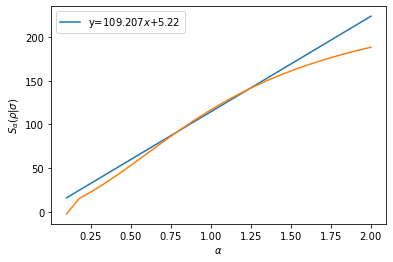

In [87]:
# Renyi relative entropy from correlation functions.
# S_alpha v.s. alpha
#In this cell, I picked a specific lambda= .3 and kappa= .5 
# It turned out that the relation is almost linear, which makes the extrapolation easy.

import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from numpy.linalg import inv 
from scipy.stats import unitary_group
from numpy import linalg as LA
from scipy.linalg import fractional_matrix_power as fracpower


def generateC(m1,m2,m):
    A = np.array((np.random.normal(0, 1, m1*m)+1j*np.random.normal(0, 1, m1*m))).reshape((m1,m))/2**0.5
    B = np.array((np.random.normal(0, 1, m2*m)+1j*np.random.normal(0, 1, m2*m))).reshape((m2,m))/2**0.5
    sqrtAB = fracpower(inv(A.conj().T.dot(A)+B.conj().T.dot(B)),0.5)
    C = sqrtAB.dot(A.conj().T).dot(A).dot(sqrtAB)
    w,v = LA.eig(C)
    for i in range(len(w)):
        if abs(w[i]<0.00001):
            w[i]=0
    w = np.real(w)
    return (C,w)

N= 1000
kappa = .5
lamb = 0.3
m=int(lamb*N)
m1=int(kappa*N)
m2=int((1-kappa)*N)
renyi_rel_S = []
identity = np.diag([1 for i in range(m)])

#generate two random correlation matrices
C1, ev1 = generateC(m1,m2,m)
C2, ev2 = generateC(m1,m2,m)

#The eigenvalues of I-C and I-C' .
ev_1_minus_C1 = 1-ev1
ev_1_minus_C2 = 1-ev2


for alpha in np.linspace(2,0.1,25):
    
    # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
    long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
    ev_last, _ = LA.eig(long_term)
    ev_last = np.real(ev_last)
    S_last_term = sum(np.log(ev_last))
    S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
    renyi_rel_S.append(S_alpha)
    
#linear fit seems to be sufficient
#i print out both the original curve and the linear fit for comparison.
s1, s0 = np.polyfit(np.linspace(2,0.1,25)[9:16], renyi_rel_S[9:16],1)
plt.plot(np.linspace(2,0.1,25), [s1*i+s0 for i in np.linspace(2,0.1,25)],label=r'y=%.3f$x$+%.2f'%(s1,s0))

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
plt.legend()
plt.plot(np.linspace(2,0.1,25), renyi_rel_S)
#plt.savefig('relative_renyi_S_vs_alpha.png',dpi=800)

print("renyi_rel_S: ",renyi_rel_S)
print('Relative entropy at alpha=1: ',sum((s1,s0)))

kappa: 0.1
lamb: 0.05


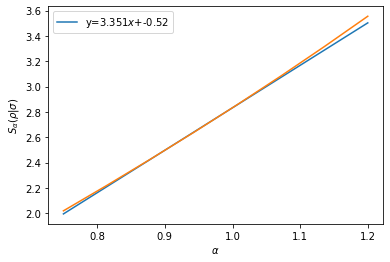

kappa: 0.1
lamb: 0.058333333333333334


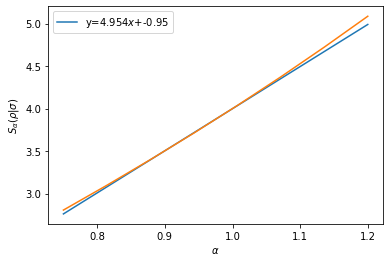

kappa: 0.1
lamb: 0.06666666666666667


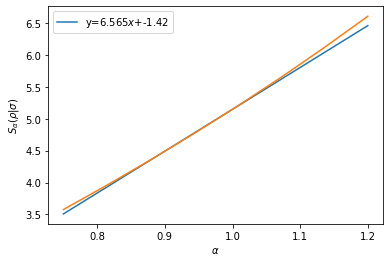

kappa: 0.1
lamb: 0.07500000000000001


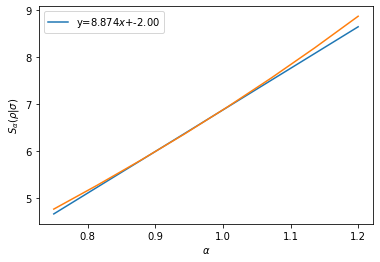

kappa: 0.1
lamb: 0.08333333333333334


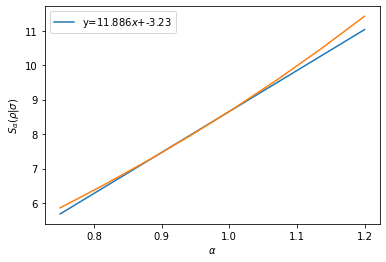

kappa: 0.1
lamb: 0.09166666666666667


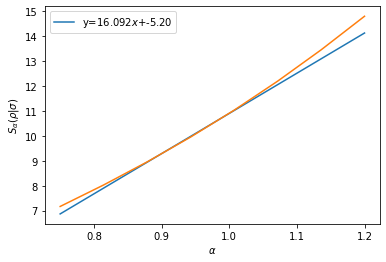

kappa: 0.1
lamb: 0.1


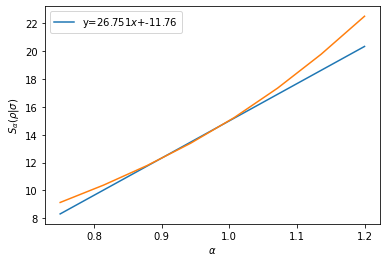

list_S_1: [2.8322448774187374, 3.9996704906419183, 5.14844769386531, 6.874968441941851, 8.65406440856544, 10.892309175232006, 14.996183670640708]
list_S_1_avg: [0.05664489754837475, 0.06895983604555031, 0.07800678324038349, 0.09166624589255802, 0.10426583624777637, 0.11969570522232974, 0.1499618367064071]


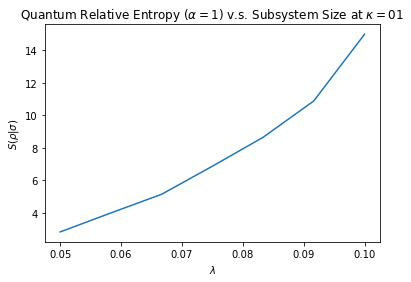

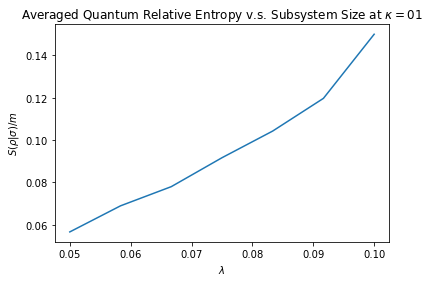

kappa: 0.30000000000000004
lamb: 0.05


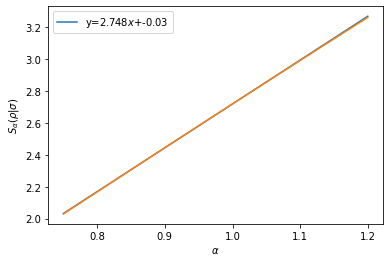

kappa: 0.30000000000000004
lamb: 0.09166666666666667


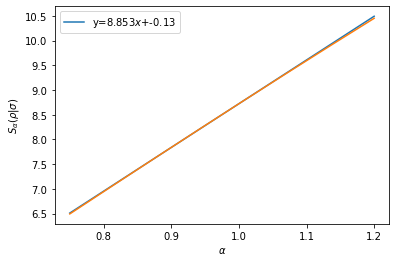

kappa: 0.30000000000000004
lamb: 0.13333333333333336


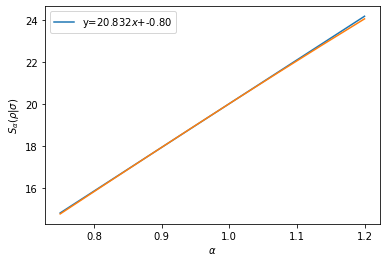

kappa: 0.30000000000000004
lamb: 0.17500000000000004


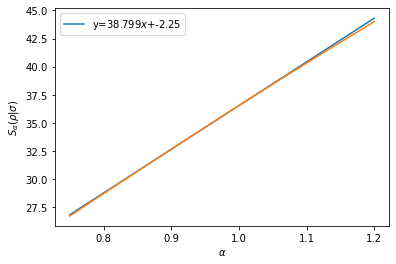

kappa: 0.30000000000000004
lamb: 0.21666666666666673


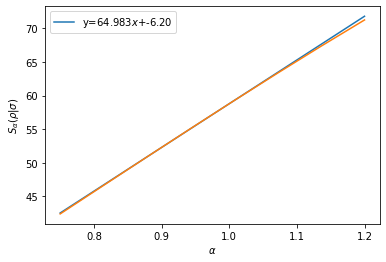

kappa: 0.30000000000000004
lamb: 0.2583333333333334


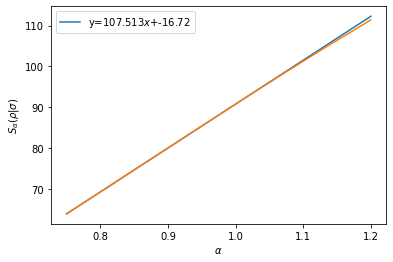

kappa: 0.30000000000000004
lamb: 0.30000000000000004


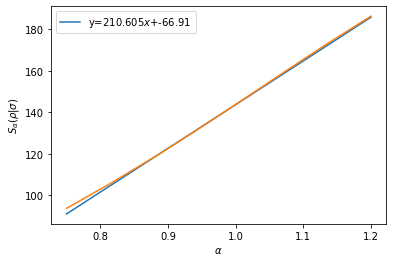

list_S_1: [2.7191677444245577, 8.723406657927574, 20.02990347341244, 36.547627456605184, 58.78419874275029, 90.78874177188905, 143.6949685604926]
list_S_1_avg: [0.05438335488849115, 0.09586161162557774, 0.15060077799558225, 0.20884358546631535, 0.27214906825347357, 0.35189434795305835, 0.4789832285349754]


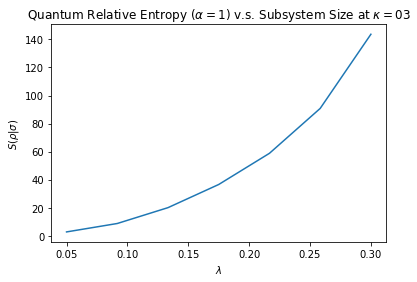

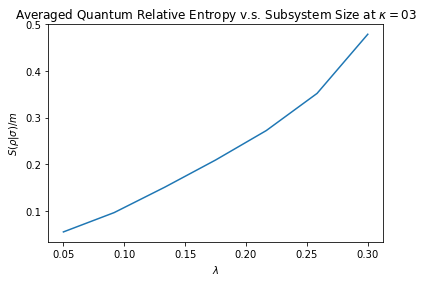

kappa: 0.5
lamb: 0.05


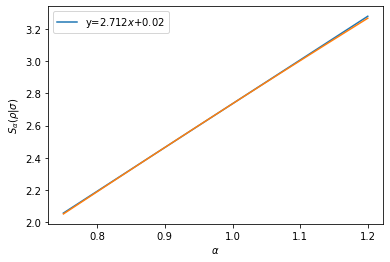

kappa: 0.5
lamb: 0.125


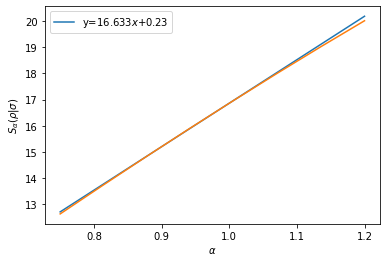

kappa: 0.5
lamb: 0.2


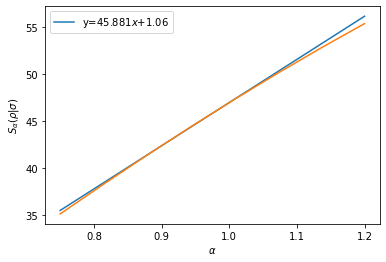

kappa: 0.5
lamb: 0.27499999999999997


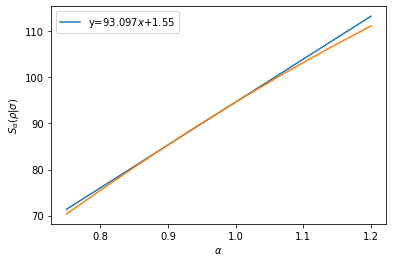

kappa: 0.5
lamb: 0.35


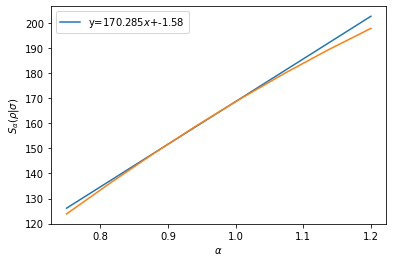

kappa: 0.5
lamb: 0.425


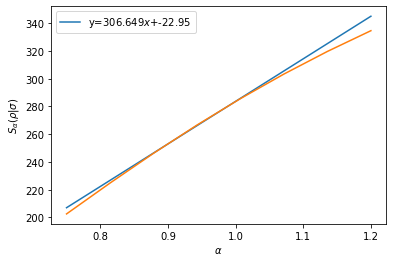

kappa: 0.5
lamb: 0.5


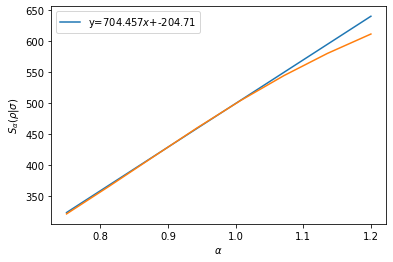

list_S_1: [2.7351516013728268, 16.85959144948212, 46.94392913237948, 94.64700522892777, 168.7090305329951, 283.69857715077194, 499.74929163973115]
list_S_1_avg: [0.054703032027456536, 0.13487673159585697, 0.2347196456618974, 0.34542702638294803, 0.4820258015228431, 0.6675260638841692, 0.9994985832794623]


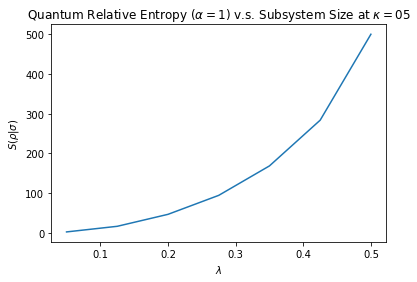

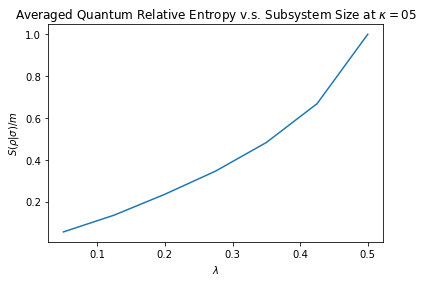

kappa: 0.7000000000000001
lamb: 0.05


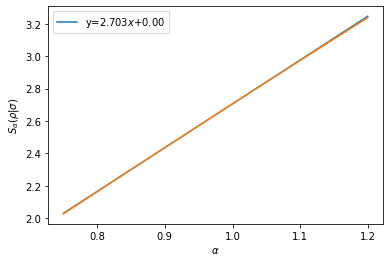

kappa: 0.7000000000000001
lamb: 0.15833333333333333


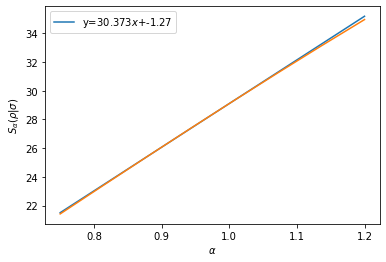

kappa: 0.7000000000000001
lamb: 0.26666666666666666


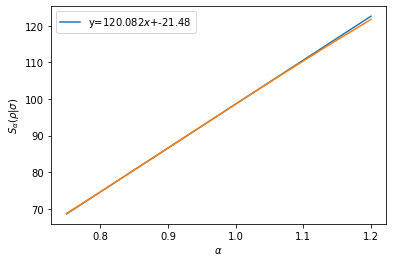

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log
/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log


kappa: 0.7000000000000001
lamb: 0.375


LinAlgError: SVD did not converge in Linear Least Squares

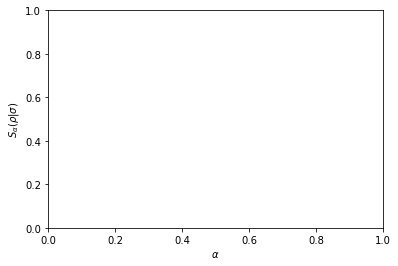

In [136]:
#Quantum relative entropy v.s. the subsystem size.
#This is done with fixed kappa=0.1, 0.3, 0.5, 0.7, 0.9 
#S_alpha=1 v.s. lambda
#It seems that S blows up when lambda is larger than lambda.
#It also seems that the entropy blows up when lambda+kappa>1.

N= 1000
for k in range(1,10,2):
    kappa = k*0.1
    list_S_1=[]
    list_S_1_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,kappa,7):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

        C1, ev1 = generateC(m1,m2,m)
        C2, ev2 = generateC(m1,m2,m)

        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in np.linspace(1.2,0.75,8):

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
        print('kappa:',kappa)
        print('lamb:',lamb)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
        s1, s0 = np.polyfit(np.linspace(1.2,0.75,8)[3:6], renyi_rel_S[3:6],1)
        plt.plot(np.linspace(1.2,0.75,8), [s1*i+s0 for i in np.linspace(1.2,0.75,8)],label=r'y=%.3f$x$+%.2f'%(s1,s0))
        plt.plot(np.linspace(1.2,0.75,8), renyi_rel_S)
        plt.legend()
        plt.show()
        list_S_1.append(s1+s0)
        list_S_1_avg.append((s1+s0)/m)
    print('list_S_1:',list_S_1)
    print('list_S_1_avg:',list_S_1_avg)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S(\rho\|\sigma)$')
    plt.title(r'Quantum Relative Entropy ($\alpha=1$) v.s. Subsystem Size at $\kappa=0.$%d'%k)
    plt.plot(list_lambda, list_S_1)
    #plt.savefig('S_1_vs_lambda_k%d.png'%k,dpi=800)
    plt.show()
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S(\rho\|\sigma)/m$')
    plt.title(r'Averaged Quantum Relative Entropy v.s. Subsystem Size at $\kappa=0.$%d'%k)
    plt.plot(list_lambda, list_S_1_avg)
    #plt.savefig('S_1_vs_lambda_avg_k%d.png'%k,dpi=800)
    plt.show()

In [1]:
#log of fidelity v.s. the subsystem size. 
#S_alpha=1/2 v.s. lambda
#I verified that the curve is very linear when 0<alpha<1, so we can handle it similarly.
#It seems that S_1/2 blows up when lambda+kappa>1 as well.

N= 500
for k in [7]:
    kappa = 0.1*k
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in [.25, .29, .35 ]:
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

        U = unitary_group.rvs(N)
        V1 = U[:m1,:m]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        a = [i for i in range(N)]
        shuffle(a)
        randlist = a[:m1]
        V2 = U[1:m1+1,:m]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)
        print("ev1: ",ev1)
        count=0
        for e in ev1:
            if abs(1-e)<0.00001:
                count+=1
        print("ratio of ones: ", count/len(ev1))
        print("(m-m2)/m",(m-m2)/m)

        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in [1/2]:

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            #print("ev_last: ",ev_last)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
        print('kappa:',kappa)
        print('lamb:',lamb)
        #plt.xlabel(r'$\alpha$')
        #plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
        #s1, s0 = np.polyfit(np.linspace(0.75,0.35,10)[4:7], renyi_rel_S[4:7],1)
       # plt.plot(np.linspace(0.75,0.35,10), [s1*i+s0 for i in np.linspace(0.75,0.35,10)],label=r'y=%.3f$x$+%.2f'%(s1,s0))
        #plt.plot(np.linspace(0.75,0.35,10), renyi_rel_S)
        #plt.legend()
        #plt.show()

        list_log_F.append(S_alpha)
        #list_log_F_avg.append((s1*0.5+s0)/m)
    print('list_log_F:',list_log_F)
    #print('list_log_F_avg: ',list_log_F_avg)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.title(r'Log of the Fidelity ($\alpha=\frac{1}{2}$) v.s. Subsystem Size at $\kappa=0.%d$'%k)
    plt.plot(list_lambda, list_log_F)
    plt.savefig('log_F_vs_lambda_k%d_new.png'%k,dpi=800)
    plt.show()
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)/m$')
    plt.title(r'Averaged Log of the Fidelity ($\alpha=\frac{1}{2}$) v.s. Subsystem Size at $\kappa=0.%d$'%k)
    plt.plot(list_lambda, list_log_F_avg)
    plt.savefig('log_F_avg_vs_lambda_k%d_new.png'%k,dpi=800)
    plt.show()


NameError: name 'np' is not defined

list_lambda:  [0.05, 0.125, 0.2, 0.27499999999999997, 0.35, 0.425, 0.5]
list_log_F:  [0.01296901744060464, 0.025001964417760765, 0.07958076147119839, 0.17329924701255917, 0.3556005722898028, 0.5134866895763343, 0.7745428334591926]
list_lambda:  [0.05, 0.125, 0.2, 0.27499999999999997, 0.35, 0.425, 0.5]
list_log_F:  [0.0013704202220797262, 0.0265850407011375, 0.11909569899852442, 0.1299037019852818, 0.27718554746249563, 0.5562982463401479, 0.741860106664382]


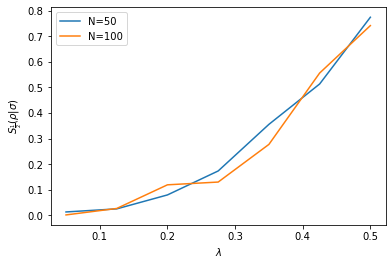

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle
from random import choice
for N in [500]:
    kappa = 0.5
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,0.5,7):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

###################################################################################
###################################################################################
# We can decide how to build our correlation matrices here,
#so this may be the only place that you need to change
        U = unitary_group.rvs(N)
        V1 = U[:m1,:m]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        #index = random.choice(range(m))
        #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
        V2 = U[1:m1+1,:m]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)
###################################################################################
###################################################################################


        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in np.linspace(0.75,0.35,10):

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)

        s1, s0 = np.polyfit(np.linspace(0.75,0.35,10)[4:7], renyi_rel_S[4:7],1)
        list_log_F.append(s1*0.5+s0)
        list_log_F_avg.append((s1*0.5+s0)/m)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.plot(list_lambda, list_log_F,label ='N=%d'%N)
    print("list_lambda: ",list_lambda)
    print("list_log_F: ", list_log_F)
plt.legend()
#plt.savefig('N_compare_with_legend_permute_1.png', dpi=800)
plt.show()


In [5]:
#Anderson
from random import uniform
W = 1
N = 10
H_anderson = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    H_anderson[i][i] = W/2*uniform(-1,1)
    if i == 0:
        H_anderson[0][1] = -1
        H_anderson[0][-1] = -1
    elif i == N-1:
        H_anderson[N-1][N-2] = -1
        H_anderson[N-1][0] = -1
    else:
        H_anderson[i][i+1] = -1
        H_anderson[i][i-1] = -1



[[-0.31907191574372706, -1, 0, 0, 0, 0, 0, 0, 0, -1], [-1, 0.14611069983902214, -1, 0, 0, 0, 0, 0, 0, 0], [0, -1, -0.3616046223238065, -1, 0, 0, 0, 0, 0, 0], [0, 0, -1, -0.4023606406282476, -1, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0.1019953289490646, -1, 0, 0, 0, 0], [0, 0, 0, 0, -1, -0.074660460438149, -1, 0, 0, 0], [0, 0, 0, 0, 0, -1, -0.0247450677394373, -1, 0, 0], [0, 0, 0, 0, 0, 0, -1, -0.08310086836705988, -1, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0.0002412479064115569, -1], [-1, 0, 0, 0, 0, 0, 0, 0, -1, 0.408929375783462]]


L:  9
list_lambda:  [0.04999999999999996, 0.07368421052631578, 0.09736842105263159, 0.1210526315789474, 0.1447368421052632, 0.168421052631579, 0.19210526315789472, 0.21578947368421053, 0.23947368421052634, 0.2631578947368421, 0.2868421052631579, 0.3105263157894737, 0.33421052631578946, 0.3578947368421053, 0.3815789473684211, 0.4052631578947368, 0.42894736842105263, 0.45263157894736844, 0.4763157894736842, 0.5]
N= 729 . List of S_1/2:  [0.0032680308095365262, 0.02123307700753685, 0.016954859549471735, 0.03199919466413803, 0.052162395884778334, 0.04260343509002951, 0.12425582808532454, 0.1119040289220834, 0.06895766244184642, 0.18046991411466706, 0.19776969867223215, 0.21872354455450704, 0.23157454789037502, 0.26489005211362837, 0.363864547161711, 0.37954638954022357, 0.6235148847638357, 0.45993870685776983, 0.6999219353458557, 0.6687754160362829]
L:  13
list_lambda:  [0.04999999999999996, 0.07368421052631578, 0.09736842105263159, 0.1210526315789474, 0.1447368421052632, 0.168421052631579

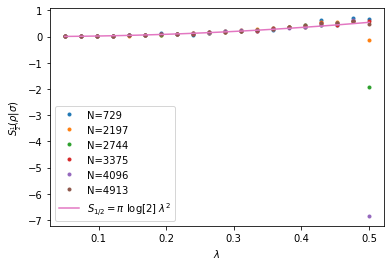

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle
from random import choice
from random import uniform
import sympy

def U_anderson(W,L):
    N=L**3
    
   
    H_anderson = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        H_anderson[i][i] = W/2*uniform(-1,1)
        x = (i) %L
        y = int((i-x)/L)%L
        z = int((i-x-y*L)/(L**2))
        i1= (x+1)%L + y*L + z*(L**2)
        i2 = (x-1)%L + y*L + z*(L**2)
        i3 = x + ((y-1)%L)*L + z*(L**2)
        i4 = x + ((y+1)%L)*L + z*(L**2)
        i5 = x + y*L + ((z-1)%L)*(L**2)
        i6 = x + y*L + ((z+1)%L)*(L**2)
        H_anderson[i][i1] = -1
        H_anderson[i][i2] = -1
        H_anderson[i][i3] = -1
        H_anderson[i][i4] = -1
        H_anderson[i][i5] = -1
        H_anderson[i][i6] = -1
    w, v = LA.eig(H_anderson)
    
    return np.array(v).T

#################################################################
# These are some parameters that you may want to play with:

W = 1 # W in the Anderson model.
range_L = [9,12,13,14,15,16,17] # note that N = L**3
kappa = 0.5
lambda_max = 0.5

###################################################################

for L in range_L:
    print("L: ",L)
    N = L**3
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for ind in np.logspace(0.05,lambda_max,20):
        lamb = math.log10(ind)
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []
    
        U = U_anderson(W,L)
        #print(U)
        rand_list = [i for i in range(N)]
        shuffle(rand_list)
        V1 = U[rand_list[:m1],:m]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        #index = random.choice(range(m))
        #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
        V2 = U[rand_list[1:m1+1],:m]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)

        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2

       # print("ev_1_minus_C1: ",ev_1_minus_C1)
       # print("ev_1_minus_C2: ",ev_1_minus_C2)
        


        for alpha in [0.5]:

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)

            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            #renyi_rel_S.append(S_alpha)
        #print('kappa:',kappa)
        #print('lamb:',lamb)
        #s1, s0 = np.polyfit(np.linspace(0.55,0.45,10)[3:7], renyi_rel_S[3:7],1)
        list_log_F.append(S_alpha)
        #list_log_F_avg.append((s1*0.5+s0)/m)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.plot(list_lambda, list_log_F,label ='N=%d'%N, linestyle ="",marker='o', markersize=3)
    print("list_lambda: ",list_lambda)
    print("N=",N,". List of S_1/2: ", list_log_F)
plt.plot(list_lambda,[3.1415926*math.log(2)*i**2 for i in list_lambda],label=r"$S_{1/2}=\pi$ $\log [2]$ $\lambda^2$")
plt.legend()
plt.gca().set_ylim(bottom=0)
#plt.savefig('log_F_Anderson_compare', dpi=800)
plt.show()




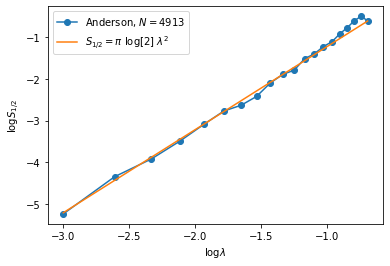

In [13]:
x= [0.04999999999999996, 0.07368421052631578, 0.09736842105263159, 0.1210526315789474, 0.1447368421052632, 0.168421052631579, 0.19210526315789472, 0.21578947368421053, 0.23947368421052634, 0.2631578947368421, 0.2868421052631579, 0.3105263157894737, 0.33421052631578946, 0.3578947368421053, 0.3815789473684211, 0.4052631578947368, 0.42894736842105263, 0.45263157894736844, 0.4763157894736842, 0.5]
x2 = np.array([math.log(i) for i in x])
y= np.array([0.005292606104518427, 0.012915680221055936, 0.019817668825510282, 0.03053351542348537, 0.04540855408686184, 0.06261693002511493, 0.07203988532228323, 0.0889463126929968, 0.12297909371704918, 0.1510836856180049, 0.16709755100441726, 0.22031973350567569, 0.24752207488518252, 0.29489607504046944, 0.33054802273545647, 0.40048045130515675, 0.4652440850768471, 0.5501143165170106, 0.6103846211108248, 0.5462892267569259]) 
y2 = [math.log(i) for i in y]
plt.ylabel(r"$\log S_{1/2}$")
plt.xlabel(r"$\log \lambda $")
plt.plot(x2,y2, marker='o',label=r"Anderson, $N=4913$")
plt.plot(x2, [math.log(3.14159*math.log(2)*i**2) for i in x], label=r"$S_{1/2}=\pi$ $\log [2]$ $\lambda^2$")
plt.legend()



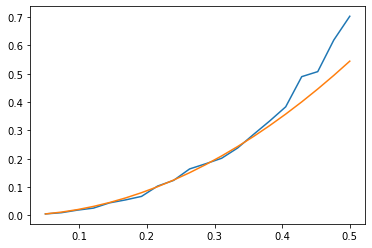

In [5]:
plt.plot(x,y)
plt.plot(x, [3.14159*math.log(2)*i**2 for i in x])

In [140]:
math.log10(1.25892541)

0.0999999993810619

In [ ]:
[0.004680120649698693, 0.03066240564094612, 0.08368108262366528, 0.16524444937836805, 0.2817964881225236, 0.4592125177064188,

N:  200
list_lambda:  [0.15, 0.18421052631578946, 0.21842105263157896, 0.25263157894736843, 0.2868421052631579, 0.32105263157894737, 0.35526315789473684, 0.3894736842105263, 0.4236842105263158, 0.45789473684210524, 0.4921052631578947, 0.5263157894736842, 0.5605263157894738, 0.5947368421052632, 0.6289473684210527, 0.6631578947368422, 0.6973684210526316, 0.7315789473684211, 0.7657894736842106, 0.8]
list_log_F:  [0.1427732422493646, 0.2046531250280328, 0.3429763093128173, 0.29041557617141756, 0.5049775314713738, 0.5247220430220008, 0.6495762009391868, 0.7401460758223024, 0.7913231232657054, 1.0065644982424509, 1.2120034171045013, 1.287182674931831, 1.132378386915832, 1.398864998107456, 1.6141605518117217, 1.7716142733527178, 1.9160243208311485, 2.3799702031846337, 2.7039148802609176, 3.248682408107996]
N:  500
list_lambda:  [0.15, 0.18421052631578946, 0.21842105263157896, 0.25263157894736843, 0.2868421052631579, 0.32105263157894737, 0.35526315789473684, 0.3894736842105263, 0.4236842105263

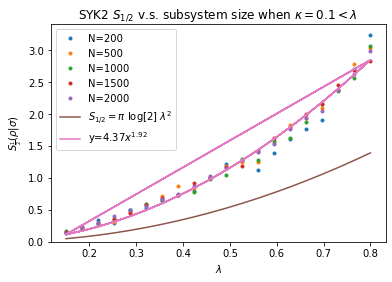

In [21]:
from scipy.optimize import curve_fit
def fit(x,a,b):
    return a*x**b
fit_x =[]
fit_y = []   
for N in [200,500,1000,1500,2000]:
    
    print("N: ",N)
    kappa = 0.1
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.15,0.8,20):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

###################################################################################
###################################################################################
# We can decide how to build our correlation matrices here,
#so this may be the only place that you need to change
        U = unitary_group.rvs(N)
        V1 = U[:m1,:m]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        #index = random.choice(range(m))
        #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
        V2 = U[1:m1+1,:m]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)
###################################################################################
###################################################################################


        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in [0.5]:

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
            if S_alpha>0:
                fit_x.append(lamb)
                fit_y.append(S_alpha)

        #s1, s0 = np.polyfit(np.linspace(0.75,0.35,10)[4:7], renyi_rel_S[4:7],1)
        #list_log_F.append(s1*0.5+s0)
        list_log_F.append(S_alpha)
        #list_log_F_avg.append((s1*0.5+s0)/m)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.plot(list_lambda, list_log_F,label ='N=%d'%N,marker="o",markersize=3,linestyle="")
    print("list_lambda: ",list_lambda)
    print("list_log_F: ", list_log_F)
plt.plot(list_lambda,[3.1415926*math.log(2)*i**2 for i in list_lambda],label=r"$S_{1/2}=\pi$ $\log [2]$ $\lambda^2$")
fit_x=np.array(fit_x)
fit_y=np.array(fit_y)
popt, pcov = curve_fit(fit, fit_x, fit_y)
plt.plot(fit_x, fit(fit_x,*popt),label=r"y=%.2f$x^{%.2f}$"%(popt[0],popt[1]))
plt.legend()
plt.title(r"SYK$2$ $S_{1/2}$ v.s. subsystem size when $\kappa=0.1<\lambda$")
plt.gca().set_ylim(bottom=0)
plt.savefig('N_compare_k<l.png', dpi=800)
plt.show()

kappa:  0.1
list_lambda:  [0.11000000000000001, 0.1977777777777778, 0.28555555555555556, 0.3733333333333334, 0.46111111111111114, 0.548888888888889, 0.6366666666666667, 0.7244444444444446, 0.8122222222222223, 0.9, 0.11000000000000001, 0.1977777777777778, 0.28555555555555556, 0.3733333333333334, 0.46111111111111114, 0.548888888888889, 0.6366666666666667, 0.7244444444444446, 0.8122222222222223, 0.9, 0.11000000000000001, 0.1977777777777778, 0.28555555555555556, 0.3733333333333334, 0.46111111111111114, 0.548888888888889, 0.6366666666666667, 0.7244444444444446, 0.8122222222222223, 0.9]
list_log_F:  [0.08497149856453579, 0.22011228991507004, 0.4610315633412778, 0.6545629077391908, 1.0178735722927819, 1.37885071023301, 1.639601357416133, 1.9711299999948366, 3.37860367061829, 3.889421062031971, 0.06662902886205302, 0.2894994081946791, 0.4129286840313231, 0.8300844364407425, 0.9134200988021384, 1.2649798849892662, 1.6730412832064232, 2.309671199547026, 2.997321552891364, 4.476426844453272, 0.08

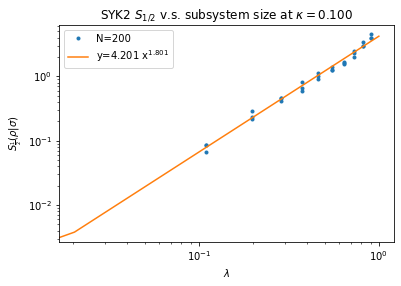

kappa:  0.11578947368421054
list_lambda:  [0.1273684210526316, 0.21146198830409357, 0.29555555555555557, 0.37964912280701757, 0.46374269005847957, 0.5478362573099416, 0.6319298245614035, 0.7160233918128655, 0.8001169590643274, 0.8842105263157894, 0.1273684210526316, 0.21146198830409357, 0.29555555555555557, 0.37964912280701757, 0.46374269005847957, 0.5478362573099416, 0.6319298245614035, 0.7160233918128655, 0.8001169590643274, 0.8842105263157894, 0.1273684210526316, 0.21146198830409357, 0.29555555555555557, 0.37964912280701757, 0.46374269005847957, 0.5478362573099416, 0.6319298245614035, 0.7160233918128655, 0.8001169590643274, 0.8842105263157894]
list_log_F:  [0.07417540106424525, 0.32364854491595274, 0.43740026121954045, 0.564569694830265, 0.8378406248260255, 1.3568926602058298, 1.751086852557897, 2.2376625358302107, 2.722982939870448, 4.316085987697804, 0.10259603129442318, 0.2109863095298916, 0.3257354393803311, 0.7736973760744341, 0.9523848751075832, 1.250171315266094, 1.7093085790

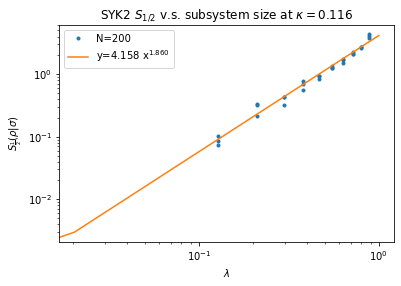

kappa:  0.13157894736842107
list_lambda:  [0.1447368421052632, 0.2251461988304094, 0.3055555555555556, 0.38596491228070184, 0.466374269005848, 0.5467836257309943, 0.6271929824561404, 0.7076023391812866, 0.7880116959064328, 0.868421052631579, 0.1447368421052632, 0.2251461988304094, 0.3055555555555556, 0.38596491228070184, 0.466374269005848, 0.5467836257309943, 0.6271929824561404, 0.7076023391812866, 0.7880116959064328, 0.868421052631579, 0.1447368421052632, 0.2251461988304094, 0.3055555555555556, 0.38596491228070184, 0.466374269005848, 0.5467836257309943, 0.6271929824561404, 0.7076023391812866, 0.7880116959064328, 0.868421052631579]
list_log_F:  [0.0998507914304998, 0.299627577201079, 0.49068282589576384, 0.6941996066539922, 0.9710142958378185, 1.2374405047783128, 1.6299580824832205, 2.0595463628692556, 2.7437084021517393, 3.5169656163760408, 0.08905320909310888, 0.18189086766792606, 0.5121013012806834, 0.5574182165108752, 1.0514201291242031, 1.575523393120534, 1.6023199845685454, 1.981

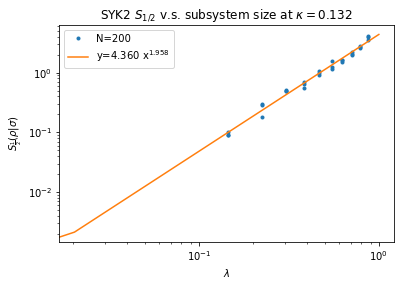

kappa:  0.1473684210526316
list_lambda:  [0.16210526315789475, 0.23883040935672517, 0.3155555555555556, 0.39228070175438595, 0.46900584795321637, 0.5457309941520467, 0.6224561403508772, 0.6991812865497076, 0.775906432748538, 0.8526315789473684, 0.16210526315789475, 0.23883040935672517, 0.3155555555555556, 0.39228070175438595, 0.46900584795321637, 0.5457309941520467, 0.6224561403508772, 0.6991812865497076, 0.775906432748538, 0.8526315789473684, 0.16210526315789475, 0.23883040935672517, 0.3155555555555556, 0.39228070175438595, 0.46900584795321637, 0.5457309941520467, 0.6224561403508772, 0.6991812865497076, 0.775906432748538, 0.8526315789473684]
list_log_F:  [0.14827610387119172, 0.28785748651808873, 0.36913631570394045, 0.6424966255516686, 0.8690431908287195, 1.3592543247554687, 1.6460864176056589, 2.0762841007041857, 2.2619962114416126, 3.3748958322397016, 0.10837317869764007, 0.2794717078305844, 0.42375886386258443, 0.8164530311442775, 1.011616273677319, 1.0599688973668435, 1.522880887

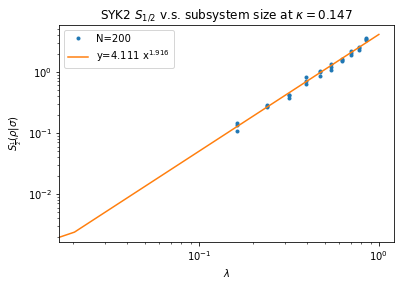

kappa:  0.1631578947368421
list_lambda:  [0.17947368421052634, 0.25251461988304097, 0.3255555555555556, 0.39859649122807017, 0.4716374269005848, 0.5446783625730994, 0.617719298245614, 0.6907602339181287, 0.7638011695906433, 0.8368421052631578, 0.17947368421052634, 0.25251461988304097, 0.3255555555555556, 0.39859649122807017, 0.4716374269005848, 0.5446783625730994, 0.617719298245614, 0.6907602339181287, 0.7638011695906433, 0.8368421052631578, 0.17947368421052634, 0.25251461988304097, 0.3255555555555556, 0.39859649122807017, 0.4716374269005848, 0.5446783625730994, 0.617719298245614, 0.6907602339181287, 0.7638011695906433, 0.8368421052631578]
list_log_F:  [0.10673877995930958, 0.22213211867352456, 0.4712119503570129, 0.6321209388410978, 0.9071546490959506, 1.2194455480767488, 1.7658096189115042, 2.0702652083632245, 2.4058179042973507, 3.2770536089400366, 0.15847137414753298, 0.24692170147467962, 0.4016865589664178, 0.7700627406896885, 0.953413885726242, 1.3283778939113873, 1.5691838116865

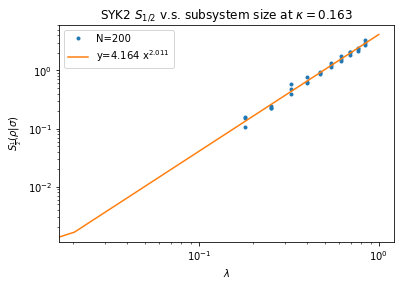

kappa:  0.17894736842105266
list_lambda:  [0.19684210526315793, 0.26619883040935677, 0.3355555555555556, 0.4049122807017544, 0.47426900584795323, 0.5436257309941521, 0.6129824561403509, 0.6823391812865497, 0.7516959064327485, 0.8210526315789474, 0.19684210526315793, 0.26619883040935677, 0.3355555555555556, 0.4049122807017544, 0.47426900584795323, 0.5436257309941521, 0.6129824561403509, 0.6823391812865497, 0.7516959064327485, 0.8210526315789474, 0.19684210526315793, 0.26619883040935677, 0.3355555555555556, 0.4049122807017544, 0.47426900584795323, 0.5436257309941521, 0.6129824561403509, 0.6823391812865497, 0.7516959064327485, 0.8210526315789474]
list_log_F:  [0.1530117535593014, 0.245418484121668, 0.46117442088529614, 0.6402886917580162, 1.0473586971801367, 1.2136849592086492, 1.4081995440715076, 1.6723414831050007, 2.5158162168073517, 2.56280192943791, 0.08326707525216648, 0.2783510567076668, 0.3812632773900404, 0.649300457314034, 0.9728062901360843, 1.1706187782513027, 1.57308301949970

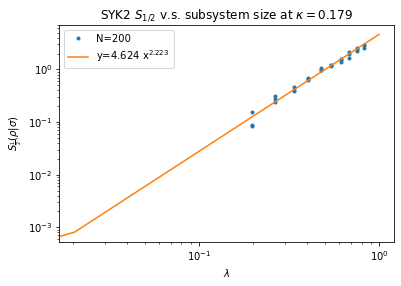

kappa:  0.19473684210526318
list_lambda:  [0.21421052631578952, 0.27988304093567257, 0.3455555555555556, 0.4112280701754386, 0.47690058479532166, 0.5425730994152047, 0.6082456140350877, 0.6739181286549707, 0.7395906432748538, 0.8052631578947368, 0.21421052631578952, 0.27988304093567257, 0.3455555555555556, 0.4112280701754386, 0.47690058479532166, 0.5425730994152047, 0.6082456140350877, 0.6739181286549707, 0.7395906432748538, 0.8052631578947368, 0.21421052631578952, 0.27988304093567257, 0.3455555555555556, 0.4112280701754386, 0.47690058479532166, 0.5425730994152047, 0.6082456140350877, 0.6739181286549707, 0.7395906432748538, 0.8052631578947368]
list_log_F:  [0.20333059798752728, 0.3015488676898208, 0.44579161471293816, 0.7669703728113504, 0.8981696344411105, 1.3558911833752347, 1.3583425771015811, 1.940704285988545, 1.9803540850486314, 2.57898316338796, 0.1761295890434944, 0.3125332815393662, 0.4780013683162707, 0.675300671882809, 1.1051821374427107, 1.3105792765184532, 1.46268828649100

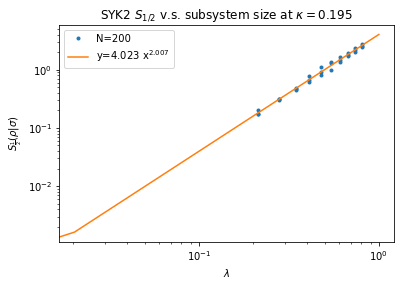

kappa:  0.21052631578947373
list_lambda:  [0.2315789473684211, 0.29356725146198837, 0.3555555555555556, 0.41754385964912283, 0.4795321637426901, 0.5415204678362573, 0.6035087719298246, 0.6654970760233918, 0.7274853801169591, 0.7894736842105263, 0.2315789473684211, 0.29356725146198837, 0.3555555555555556, 0.41754385964912283, 0.4795321637426901, 0.5415204678362573, 0.6035087719298246, 0.6654970760233918, 0.7274853801169591, 0.7894736842105263, 0.2315789473684211, 0.29356725146198837, 0.3555555555555556, 0.41754385964912283, 0.4795321637426901, 0.5415204678362573, 0.6035087719298246, 0.6654970760233918, 0.7274853801169591, 0.7894736842105263]
list_log_F:  [0.19411297774905734, 0.2692235140813004, 0.5978973674682138, 0.5798536185963385, 0.6754612991905447, 1.0351889330787998, 1.4545524869161852, 1.5668002130127547, 1.8762056854749574, 3.1853030339826773, 0.20618996267685574, 0.2794643830410948, 0.3864538128546613, 0.7450553470415642, 0.8395225248934182, 1.0373558474894509, 1.5596129667101

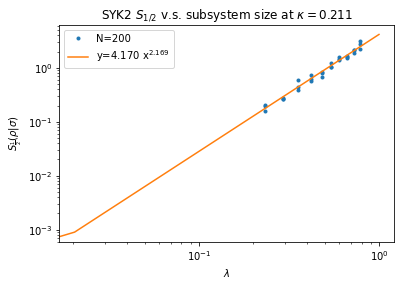

kappa:  0.22631578947368425
list_lambda:  [0.2489473684210527, 0.30725146198830416, 0.3655555555555556, 0.42385964912280705, 0.48216374269005846, 0.5404678362573099, 0.5987719298245614, 0.6570760233918128, 0.7153801169590643, 0.7736842105263158, 0.2489473684210527, 0.30725146198830416, 0.3655555555555556, 0.42385964912280705, 0.48216374269005846, 0.5404678362573099, 0.5987719298245614, 0.6570760233918128, 0.7153801169590643, 0.7736842105263158, 0.2489473684210527, 0.30725146198830416, 0.3655555555555556, 0.42385964912280705, 0.48216374269005846, 0.5404678362573099, 0.5987719298245614, 0.6570760233918128, 0.7153801169590643, 0.7736842105263158]
list_log_F:  [0.2638991582097532, 0.3478212327028203, 0.41419618561454996, 0.6110847202136611, 0.8957837296022717, 1.1180992439220034, 1.169278483458939, 1.455617297107949, 1.9054183665880373, 2.6420866640826546, 0.20560781565513864, 0.31098379309345603, 0.49430272191290925, 0.5695939734848707, 0.7679827211196226, 1.2767264551645496, 1.4746397745

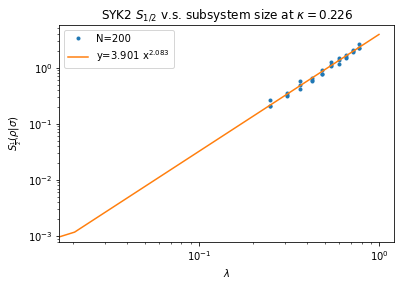

kappa:  0.24210526315789477
list_lambda:  [0.2663157894736843, 0.32093567251461996, 0.3755555555555556, 0.4301754385964912, 0.4847953216374269, 0.5394152046783626, 0.5940350877192981, 0.6486549707602338, 0.7032748538011695, 0.7578947368421052, 0.2663157894736843, 0.32093567251461996, 0.3755555555555556, 0.4301754385964912, 0.4847953216374269, 0.5394152046783626, 0.5940350877192981, 0.6486549707602338, 0.7032748538011695, 0.7578947368421052, 0.2663157894736843, 0.32093567251461996, 0.3755555555555556, 0.4301754385964912, 0.4847953216374269, 0.5394152046783626, 0.5940350877192981, 0.6486549707602338, 0.7032748538011695, 0.7578947368421052]
list_log_F:  [0.2092099594108987, 0.48594654517320635, 0.4569618853023911, 0.6625160071901064, 0.8943804503390993, 1.1596052257980176, 1.4734486494857464, 1.427008042849664, 2.2125735373260795, 1.8945989048633578, 0.2161507047140745, 0.349741859182636, 0.5642151839881677, 0.7123260302555963, 0.7146986077780753, 0.964759431018976, 1.3222300564387695, 1.

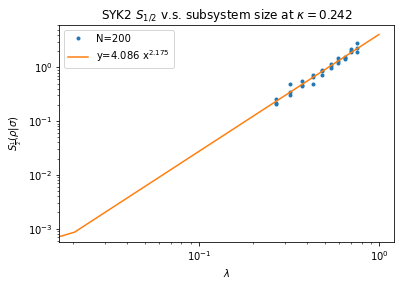

kappa:  0.2578947368421053
list_lambda:  [0.2836842105263158, 0.3346198830409357, 0.38555555555555554, 0.43649122807017543, 0.4874269005847953, 0.5383625730994153, 0.589298245614035, 0.6402339181286549, 0.6911695906432749, 0.7421052631578947, 0.2836842105263158, 0.3346198830409357, 0.38555555555555554, 0.43649122807017543, 0.4874269005847953, 0.5383625730994153, 0.589298245614035, 0.6402339181286549, 0.6911695906432749, 0.7421052631578947, 0.2836842105263158, 0.3346198830409357, 0.38555555555555554, 0.43649122807017543, 0.4874269005847953, 0.5383625730994153, 0.589298245614035, 0.6402339181286549, 0.6911695906432749, 0.7421052631578947]
list_log_F:  [0.2030300800839413, 0.32821399300875953, 0.4372929364424394, 0.8048729249243962, 0.9431905560720963, 1.13171439318387, 1.320298199425011, 1.5208339650036464, 2.041597242486745, 2.4150877437306804, 0.18663718615525227, 0.38360409867915735, 0.4747968356992871, 0.622026340156367, 0.7710406276667499, 1.1987409412879515, 1.389188143949852, 1.70

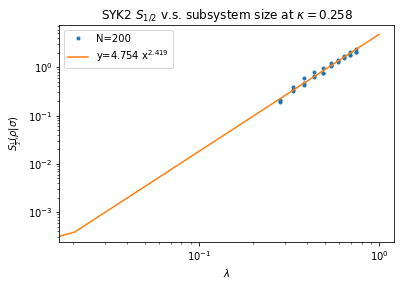

kappa:  0.27368421052631586
list_lambda:  [0.30105263157894746, 0.34830409356725156, 0.3955555555555556, 0.44280701754385965, 0.49005847953216375, 0.5373099415204678, 0.5845614035087718, 0.6318128654970759, 0.67906432748538, 0.7263157894736841, 0.30105263157894746, 0.34830409356725156, 0.3955555555555556, 0.44280701754385965, 0.49005847953216375, 0.5373099415204678, 0.5845614035087718, 0.6318128654970759, 0.67906432748538, 0.7263157894736841, 0.30105263157894746, 0.34830409356725156, 0.3955555555555556, 0.44280701754385965, 0.49005847953216375, 0.5373099415204678, 0.5845614035087718, 0.6318128654970759, 0.67906432748538, 0.7263157894736841]
list_log_F:  [0.300423619081549, 0.3420040159869515, 0.5198892279424996, 0.673180713425424, 0.7934564934231361, 0.8718507809762173, 1.1240323453478425, 1.5395451612099578, 1.7711392318822448, 1.8121508080498074, 0.1910026243970009, 0.48646624903620506, 0.5482514913640841, 0.684087047831099, 0.7112800532053143, 1.0044503869525272, 1.1380742492856655,

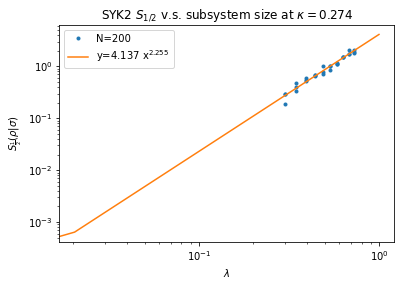

kappa:  0.2894736842105263
list_lambda:  [0.318421052631579, 0.3619883040935673, 0.40555555555555556, 0.44912280701754387, 0.4926900584795322, 0.5362573099415204, 0.5798245614035087, 0.623391812865497, 0.6669590643274854, 0.7105263157894737, 0.318421052631579, 0.3619883040935673, 0.40555555555555556, 0.44912280701754387, 0.4926900584795322, 0.5362573099415204, 0.5798245614035087, 0.623391812865497, 0.6669590643274854, 0.7105263157894737, 0.318421052631579, 0.3619883040935673, 0.40555555555555556, 0.44912280701754387, 0.4926900584795322, 0.5362573099415204, 0.5798245614035087, 0.623391812865497, 0.6669590643274854, 0.7105263157894737]
list_log_F:  [0.2815215859772948, 0.42337771624791287, 0.5414246124991848, 0.6078161986893065, 1.0134330884878295, 0.9540284716314602, 1.0718723405160802, 1.3476309929380648, 1.7815008276267008, 2.206635439699653, 0.2698931102481623, 0.42132815800052725, 0.5480497198544185, 0.6185313427727266, 0.8202748297898097, 1.0763365205268656, 0.9628651711645801, 1.4

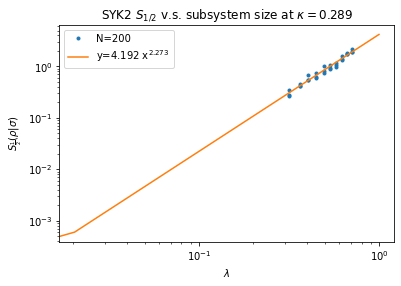

kappa:  0.3052631578947369
list_lambda:  [0.33578947368421064, 0.37567251461988316, 0.4155555555555556, 0.4554385964912281, 0.4953216374269006, 0.5352046783625731, 0.5750877192982455, 0.6149707602339181, 0.6548538011695906, 0.6947368421052631, 0.33578947368421064, 0.37567251461988316, 0.4155555555555556, 0.4554385964912281, 0.4953216374269006, 0.5352046783625731, 0.5750877192982455, 0.6149707602339181, 0.6548538011695906, 0.6947368421052631, 0.33578947368421064, 0.37567251461988316, 0.4155555555555556, 0.4554385964912281, 0.4953216374269006, 0.5352046783625731, 0.5750877192982455, 0.6149707602339181, 0.6548538011695906, 0.6947368421052631]
list_log_F:  [0.2873371994661795, 0.4406915605724748, 0.5739848253586075, 0.5757580179052724, 0.8618590228495435, 1.006002822275775, 1.0236070848201564, 1.507281794285177, 1.7445889681157212, 1.5169755027204985, 0.3787833844126496, 0.524637733322308, 0.5546409237256711, 0.6932056724101017, 0.7819095111009631, 0.9754576456211765, 1.2711201892883253, 1

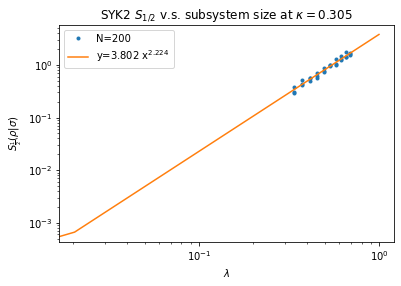

kappa:  0.3210526315789474
list_lambda:  [0.35315789473684217, 0.3893567251461989, 0.4255555555555556, 0.46175438596491225, 0.497953216374269, 0.5341520467836257, 0.5703508771929824, 0.6065497076023392, 0.6427485380116957, 0.6789473684210525, 0.35315789473684217, 0.3893567251461989, 0.4255555555555556, 0.46175438596491225, 0.497953216374269, 0.5341520467836257, 0.5703508771929824, 0.6065497076023392, 0.6427485380116957, 0.6789473684210525, 0.35315789473684217, 0.3893567251461989, 0.4255555555555556, 0.46175438596491225, 0.497953216374269, 0.5341520467836257, 0.5703508771929824, 0.6065497076023392, 0.6427485380116957, 0.6789473684210525]
list_log_F:  [0.3014574879147034, 0.4837329848876806, 0.5889031929073241, 0.764503516681927, 0.8687613246585073, 0.9374297618613525, 0.9576078553868683, 1.1409491823262101, 1.5892616197915004, 1.5523214284894777, 0.31623534527209074, 0.4106661812173229, 0.5006133717087948, 0.6805685247655333, 0.8584748302036758, 1.0858060206919902, 1.2034866245385842, 1

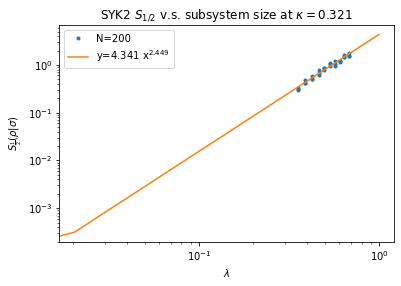

kappa:  0.33684210526315794
list_lambda:  [0.37052631578947376, 0.4030409356725147, 0.4355555555555556, 0.4680701754385965, 0.5005847953216375, 0.5330994152046784, 0.5656140350877192, 0.5981286549707602, 0.6306432748538011, 0.6631578947368421, 0.37052631578947376, 0.4030409356725147, 0.4355555555555556, 0.4680701754385965, 0.5005847953216375, 0.5330994152046784, 0.5656140350877192, 0.5981286549707602, 0.6306432748538011, 0.6631578947368421, 0.37052631578947376, 0.4030409356725147, 0.4355555555555556, 0.4680701754385965, 0.5005847953216375, 0.5330994152046784, 0.5656140350877192, 0.5981286549707602, 0.6306432748538011, 0.6631578947368421]
list_log_F:  [0.46133900488794666, 0.5285908533287937, 0.5557954543466082, 0.6674568841937969, 0.6530232250094059, 0.879964073475378, 1.1256482687930998, 1.2616843093996408, 1.3907724927941274, 1.4850037026941152, 0.3914866623518236, 0.4439532579857257, 0.6899163984839021, 0.5837283585363053, 0.7465967387387309, 0.931090819528805, 0.9679735046829023, 1

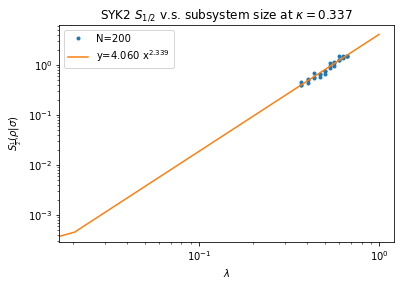

kappa:  0.3526315789473685
list_lambda:  [0.3878947368421054, 0.4167251461988305, 0.44555555555555565, 0.47438596491228074, 0.5032163742690059, 0.532046783625731, 0.5608771929824561, 0.5897076023391812, 0.6185380116959064, 0.6473684210526315, 0.3878947368421054, 0.4167251461988305, 0.44555555555555565, 0.47438596491228074, 0.5032163742690059, 0.532046783625731, 0.5608771929824561, 0.5897076023391812, 0.6185380116959064, 0.6473684210526315, 0.3878947368421054, 0.4167251461988305, 0.44555555555555565, 0.47438596491228074, 0.5032163742690059, 0.532046783625731, 0.5608771929824561, 0.5897076023391812, 0.6185380116959064, 0.6473684210526315]
list_log_F:  [0.35428173513410854, 0.4801999768527594, 0.5853793081930831, 0.7768778453940257, 1.0679886728728718, 0.8804665407753873, 0.9577569710664022, 1.1037314114440733, 1.2114187894597137, 1.5615500722501565, 0.4110009601675415, 0.47011613535848085, 0.5286206315015249, 0.6048237930218363, 0.7960339424615199, 1.0150196051327214, 0.8499593883620378,

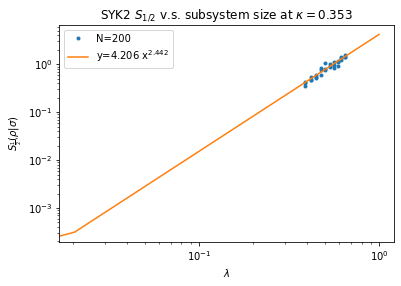

kappa:  0.368421052631579
list_lambda:  [0.40526315789473694, 0.4304093567251463, 0.4555555555555556, 0.48070175438596496, 0.5058479532163743, 0.5309941520467837, 0.5561403508771929, 0.5812865497076023, 0.6064327485380117, 0.631578947368421, 0.40526315789473694, 0.4304093567251463, 0.4555555555555556, 0.48070175438596496, 0.5058479532163743, 0.5309941520467837, 0.5561403508771929, 0.5812865497076023, 0.6064327485380117, 0.631578947368421, 0.40526315789473694, 0.4304093567251463, 0.4555555555555556, 0.48070175438596496, 0.5058479532163743, 0.5309941520467837, 0.5561403508771929, 0.5812865497076023, 0.6064327485380117, 0.631578947368421]
list_log_F:  [0.5999316288945238, 0.5958039221397229, 0.7850647687674268, 0.6231205934842023, 0.7342347794615876, 0.9067049079137632, 0.9990151494964721, 0.9628175467019844, 1.4147164348242143, 1.328740909935135, 0.41347315845740695, 0.4526557180017363, 0.6430839312288015, 0.7333840414497672, 0.8848823744068284, 0.8447683943677475, 0.8365705946001185, 1.

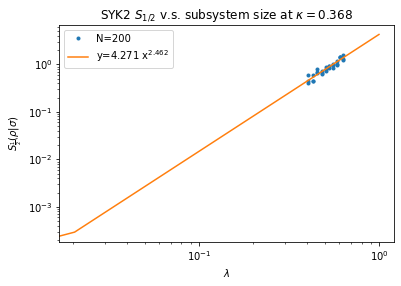

kappa:  0.38421052631578956
list_lambda:  [0.4226315789473685, 0.4440935672514621, 0.4655555555555556, 0.4870175438596492, 0.5084795321637428, 0.5299415204678363, 0.5514035087719298, 0.5728654970760234, 0.5943274853801169, 0.6157894736842104, 0.4226315789473685, 0.4440935672514621, 0.4655555555555556, 0.4870175438596492, 0.5084795321637428, 0.5299415204678363, 0.5514035087719298, 0.5728654970760234, 0.5943274853801169, 0.6157894736842104, 0.4226315789473685, 0.4440935672514621, 0.4655555555555556, 0.4870175438596492, 0.5084795321637428, 0.5299415204678363, 0.5514035087719298, 0.5728654970760234, 0.5943274853801169, 0.6157894736842104]
list_log_F:  [0.5767960617406374, 0.5146026581768126, 0.6314625762842923, 0.673154433687472, 0.6256067636941509, 0.932204660790461, 0.9987183047392705, 0.9624279461690719, 1.1812341131574726, 1.0845998715837482, 0.4418448098527108, 0.6184290803995651, 0.6060842870417673, 0.857333517192302, 0.7575290863422595, 0.8137343478187518, 0.822819430361875, 1.00915

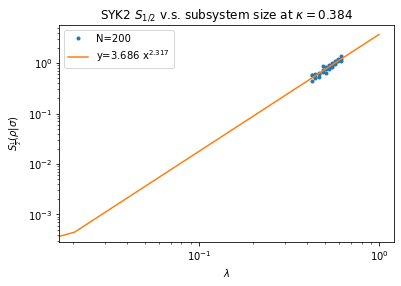

kappa:  0.4
list_lambda:  [0.44000000000000006, 0.45777777777777784, 0.4755555555555556, 0.49333333333333335, 0.5111111111111111, 0.5288888888888889, 0.5466666666666666, 0.5644444444444444, 0.5822222222222222, 0.6, 0.44000000000000006, 0.45777777777777784, 0.4755555555555556, 0.49333333333333335, 0.5111111111111111, 0.5288888888888889, 0.5466666666666666, 0.5644444444444444, 0.5822222222222222, 0.6, 0.44000000000000006, 0.45777777777777784, 0.4755555555555556, 0.49333333333333335, 0.5111111111111111, 0.5288888888888889, 0.5466666666666666, 0.5644444444444444, 0.5822222222222222, 0.6]
list_log_F:  [0.5958522535973998, 0.4216565188442871, 0.6886799471668326, 0.8337074179773083, 0.7972781667446327, 0.9868210093952996, 1.0227210409148597, 0.9336054867511052, 1.0576667738756669, 1.1802809853397775, 0.454988037349068, 0.5392489008496568, 0.6004768107378595, 0.7473571677081452, 0.7633829450154792, 0.7669484018913124, 0.897718881960003, 0.9953267167316255, 0.9965039315792694, 1.179118799794992

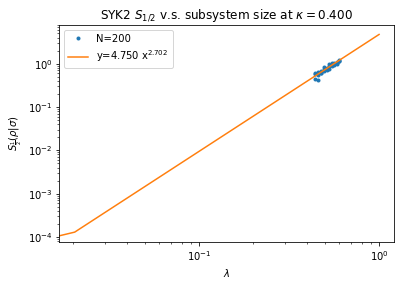

2.2719643415698902 1.6362297758958877


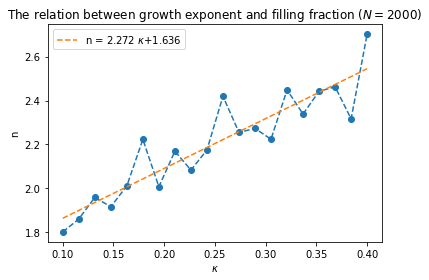

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle
from random import choice
from random import uniform
import sympy


growth_rate_list = []
kappa_list=[]
for kappa in np.linspace(0.1,0.4,20):
    kappa_list.append(kappa)
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    print("kappa: ",kappa)
    for N in [200,200,200]:
        
        #print("N: ",N)

        for lamb in np.linspace(kappa*1.1,1-kappa,10):
            m=int(lamb*N)
            m1=int(kappa*N)
            m2=int((1-kappa)*N)
            identity = np.diag([1 for i in range(m)])
            list_lambda.append(lamb)
            renyi_rel_S = []

    ###################################################################################
    ###################################################################################
    # We can decide how to build our correlation matrices here,
    #so this may be the only place that you need to change
            U = unitary_group.rvs(N)
            V1 = U[:m1,:m]
            C1 = V1.conj().T.dot(V1)
            ev1,_ = LA.eig(C1)
            ev1 = np.real(ev1)
            #index = random.choice(range(m))
            #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
            V2 = U[1:m1+1,:m]
            C2 = V2.conj().T.dot(V2)
            ev2,_ = LA.eig(C2)
            ev2 = np.real(ev2)
    ###################################################################################
    ###################################################################################


            #The eigenvalues of I-C and I-C' .
            ev_1_minus_C1 = 1-ev1
            ev_1_minus_C2 = 1-ev2


            for alpha in [0.5]:

                # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
                long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
                ev_last, _ = LA.eig(long_term)
                ev_last = np.real(ev_last)
                S_last_term = sum(np.log(ev_last))
                S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
                renyi_rel_S.append(S_alpha)

            #s1, s0 = np.polyfit(np.linspace(0.75,0.35,10)[4:7], renyi_rel_S[4:7],1)
            #list_log_F.append(s1*0.5+s0)
            list_log_F.append(S_alpha)
            #list_log_F_avg.append((s1*0.5+s0)/m)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.loglog(list_lambda, list_log_F,label ='N=%d'%N,marker="o",markersize=3,linestyle="")
    print("list_lambda: ",list_lambda)
    print("list_log_F: ", list_log_F)
    
    ###################################
    xlog = np.log(list_lambda)
    ylog = np.log(list_log_F)
    s1, s0 = np.polyfit(xlog, ylog,1)
    print("log S_1/2 = ",s1 ,"log lambda + ",s0)
    plt.loglog(np.linspace(0,1,50),[math.exp(s0)*i**(s1) for i in np.linspace(0,1,50)],label= r"y=%.3f x$^{%.3f}$"%(np.exp(s0),s1))
    growth_rate_list.append(s1)
    #####################################
    
    #plt.loglog(np.linspace(0,0.5,30),[3.1415926*math.log(2)*i**2 for i in np.linspace(0,0.5,30)],label=r"$S_{1/2}=\pi$ $\log [2]$ $\lambda^2$")
    plt.legend()
    plt.title(r"SYK$2$ $S_{1/2}$ v.s. subsystem size at $\kappa=$%.3f"%kappa)
    #plt.gca().set_ylim(bottom=0)
    #plt.savefig('N_compare_with_legend_permute_1.png', dpi=800)
    plt.show()
plt.xlabel(r"$\kappa$")
plt.ylabel(r"n")
plt.title(r"The relation between growth exponent and filling fraction ($N=2000$)")
plt.plot(kappa_list, growth_rate_list, marker='o',linestyle='--')
s1, s0 = np.polyfit(kappa_list, growth_rate_list,1)
print(s1,s0)
plt.plot(kappa_list, [s1*i+s0 for i in kappa_list],linestyle='--',label=r"n = %.3f $\kappa$+%.3f"%(s1,s0))
plt.legend()
plt.savefig('weird_n_to_kappa_%d.png'%N, dpi=800)
plt.show()

0.1402605520635276 2.0349197482781682


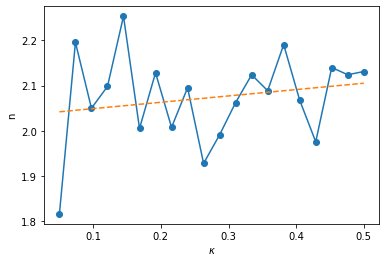

In [4]:
plt.xlabel(r"$\kappa$")
plt.ylabel(r"n")
plt.plot(kappa_list, growth_rate_list, marker='o')
s1, s0 = np.polyfit(kappa_list, growth_rate_list,1)
print(s1,s0)
plt.plot(kappa_list, [s1*i+s0 for i in kappa_list],linestyle='--')
#plt.savefig("power_to_kappa.png",dpi=800)

Kappa: 0.06
Sample: -5.780447308910627e-06
Theory: -7.2000000000000005e-06
error:  19.71600959846352 %

Kappa: 0.06666666666666667
Sample: -6.704779153365928e-06
Theory: -8e-06
error:  16.190260582925895 %

Kappa: 0.07333333333333333
Sample: -7.169033282277376e-06
Theory: -8.800000000000002e-06
error:  18.533712701393476 %

Kappa: 0.07999999999999999
Sample: -7.661631133156059e-06
Theory: -9.600000000000001e-06
error:  20.19134236295773 %

Kappa: 0.08666666666666667
Sample: -8.685996346397112e-06
Theory: -1.0400000000000004e-05
error:  16.480804361566257 %

Kappa: 0.09333333333333332
Sample: -8.771596414489955e-06
Theory: -1.1200000000000001e-05
error:  21.68217487062541 %

Kappa: 0.09999999999999999
Sample: -9.321936281139781e-06
Theory: -1.2e-05
error:  22.317197657168496 %

Kappa: 0.10666666666666666
Sample: -9.782234640750013e-06
Theory: -1.2800000000000001e-05
error:  23.57629186914053 %

Kappa: 0.11333333333333333
Sample: -1.0395842580447333e-05
Theory: -1.36e-05
error:  23.55998

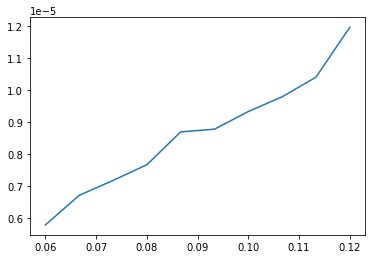

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle
from random import choice
from random import uniform
import sympy


for N in [1000]:
    kappa_list=[]
    cccc_list = []
    lamb = 0.1
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for kappa in np.linspace(0.06,0.12,10):
        list_cc=[]
        list_cccc=[]
        for i in range(50):
            m=int(lamb*N)
            m1=int(kappa*N)
            m2=int((1-kappa)*N)
            identity = np.diag([1 for i in range(m)])
            list_lambda.append(lamb)
            renyi_rel_S = []

    ###################################################################################
    ###################################################################################
    # We can decide how to build our correlation matrices here,
    #so this may be the only place that you need to change
            U = unitary_group.rvs(N)
            V1 = U[:m1,:m]
            C1 = V1.conj().T.dot(V1)
            ev1,_ = LA.eig(C1)
            ev1 = np.real(ev1)
            #index = random.choice(range(m))
            #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
            V2 = U[3:m1+3,:m]
            C2 = V2.conj().T.dot(V2)
            ev2,_ = LA.eig(C2)
            ev2 = np.real(ev2)
            CC = C1.dot(C2)-C2.dot(C1)
            CCCC = CC.dot(CC)
            list_cc.append(CC[10][10])
            list_cccc.append(CCCC[10][10])
        kappa_list.append(kappa)
        list_cc=np.real(list_cc)
        list_cccc = np.real(list_cccc)
        cccc_list.append(-np.real(np.mean(list_cccc)))
        print("Kappa:",kappa)
        sample = np.mean(list_cccc)
        print("Sample:",sample)
        theory = -3*(4*kappa*lamb**2)/N
        print("Theory:",theory)
        print("error: ", abs((sample-theory)/theory)*100,"%\n")
    plt.plot(kappa_list,cccc_list)
        

In [9]:
# SYK2'S Standard deviation
# Std's are stored in a dictionary called "data"


import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle
from random import choice
from random import uniform
import sympy



from scipy.optimize import curve_fit
def fit(x,a,b):
    return a*x**b
fit_x =[]
fit_y = []   
#data = {}
for N in [200, 500, 750, 1000, 1250, 1500]:
    
    print("N: ",N)
    kappa = 0.5
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.15,0.5,20):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        list_log_F=[]
        for count in range(20):
            

    ###################################################################################
    ###################################################################################
    # We can decide how to build our correlation matrices here,
    #so this may be the only place that you need to change
            U = unitary_group.rvs(N)
            V1 = U[:m1,:m]
            C1 = V1.conj().T.dot(V1)
            ev1,_ = LA.eig(C1)
            ev1 = np.real(ev1)
            #index = random.choice(range(m))
            #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
            V2 = U[1:m1+1,:m]
            C2 = V2.conj().T.dot(V2)
            ev2,_ = LA.eig(C2)
            ev2 = np.real(ev2)
    ###################################################################################
    ###################################################################################


            #The eigenvalues of I-C and I-C' .
            ev_1_minus_C1 = 1-ev1
            ev_1_minus_C2 = 1-ev2


            for alpha in [0.5]:

                # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
                long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
                ev_last, _ = LA.eig(long_term)
                ev_last = np.real(ev_last)
                S_last_term = sum(np.log(ev_last))
                S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term

            list_log_F.append(S_alpha)
        data[(N,lamb)]=np.std(list_log_F)

N:  200
N:  500
N:  750
N:  1000
N:  1250
N:  1500


In [10]:
print(data)

{(200, 0.15): 0.0170735788843382, (200, 0.16842105263157894): 0.008220695802080253, (200, 0.1868421052631579): 0.01429841355582991, (200, 0.20526315789473681): 0.0190104927176097, (200, 0.22368421052631576): 0.017031633539882643, (200, 0.2421052631578947): 0.02034532400447515, (200, 0.26052631578947366): 0.026017773588587364, (200, 0.2789473684210526): 0.02495193893116092, (200, 0.29736842105263156): 0.02966962784428399, (200, 0.3157894736842105): 0.03190750603287909, (200, 0.33421052631578946): 0.03350707988784479, (200, 0.3526315789473684): 0.04614741156455056, (200, 0.3710526315789473): 0.05007787641795704, (200, 0.3894736842105263): 0.0413041783715737, (200, 0.4078947368421052): 0.0438172620485154, (200, 0.4263157894736842): 0.045331197823429405, (200, 0.4447368421052631): 0.0560775204606143, (200, 0.4631578947368421): 0.059947504363390525, (200, 0.481578947368421): 0.05706238919517275, (200, 0.5): 0.07636586824951708, (500, 0.15): 0.008889111983626964, (500, 0.16842105263157894): 

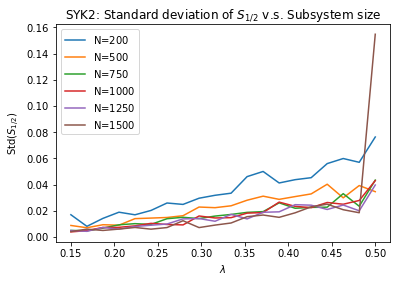

In [18]:

for N in [200, 500, 750, 1000, 1250, 1500]:
    y_ = []
    for lamb in np.linspace(0.15,0.5,20):
        y_.append(data_Anderson[(N,lamb)])
    plt.plot(np.linspace(0.15,0.5,20), y_,label=r"N=$%d$"%N)
plt.legend()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Std($S_{1/2}$)")
plt.title(r"SYK2: Standard deviation of $S_{1/2}$ v.s. Subsystem size")
#plt.savefig("std_SYK2.png", dpi=800)

In [22]:
# Anderson's standard deviation
# Std's are stored in a dictionary called "data_Anderson"

import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle
from random import choice
from random import uniform
import sympy

def U_anderson(W,L):
    N=L**3
    
   
    H_anderson = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        H_anderson[i][i] = W/2*uniform(-1,1)
        x = (i) %L
        y = int((i-x)/L)%L
        z = int((i-x-y*L)/(L**2))
        i1= (x+1)%L + y*L + z*(L**2)
        i2 = (x-1)%L + y*L + z*(L**2)
        i3 = x + ((y-1)%L)*L + z*(L**2)
        i4 = x + ((y+1)%L)*L + z*(L**2)
        i5 = x + y*L + ((z-1)%L)*(L**2)
        i6 = x + y*L + ((z+1)%L)*(L**2)
        H_anderson[i][i1] = -1
        H_anderson[i][i2] = -1
        H_anderson[i][i3] = -1
        H_anderson[i][i4] = -1
        H_anderson[i][i5] = -1
        H_anderson[i][i6] = -1
    w, v = LA.eig(H_anderson)
    
    return np.array(v).T

#################################################################
# These are some parameters that you may want to play with:

W = 1 # W in the Anderson model.
range_L = [7,9,12,13,14] # note that N = L**3
kappa = 0.5
lambda_max = 0.45

###################################################################

data_Anderson = {}
for L in range_L:
    print("L: ",L)
    N = L**3
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,lambda_max,20):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        list_log_F=[]
        for count in range(20):
            U = U_anderson(W,L)
            #print(U)
            rand_list = [i for i in range(N)]
            shuffle(rand_list)
            V1 = U[rand_list[:m1],:m]
            C1 = V1.conj().T.dot(V1)
            ev1,_ = LA.eig(C1)
            ev1 = np.real(ev1)
            #index = random.choice(range(m))
            #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
            V2 = U[rand_list[1:m1+1],:m]
            C2 = V2.conj().T.dot(V2)
            ev2,_ = LA.eig(C2)
            ev2 = np.real(ev2)

            #The eigenvalues of I-C and I-C' .
            ev_1_minus_C1 = 1-ev1
            ev_1_minus_C2 = 1-ev2



            for alpha in [0.5]:

                # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
                long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
                ev_last, _ = LA.eig(long_term)
                ev_last = np.real(ev_last)

                S_last_term = sum(np.log(ev_last))
                S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            list_log_F.append(S_alpha)
        data_Anderson[(N,lamb)]=np.std(list_log_F)


L:  7
L:  9
L:  12


/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in log


L:  13
L:  14


In [23]:
data_Anderson

{(343, 0.05): 0.0049647435845407905,
 (343, 0.0736842105263158): 0.007049143547818055,
 (343, 0.09736842105263158): 0.007582363311840179,
 (343, 0.12105263157894737): 0.014043283245211063,
 (343, 0.14473684210526316): 0.015346798323741345,
 (343, 0.16842105263157897): 0.02062991396435674,
 (343, 0.19210526315789472): 0.026627283806258475,
 (343, 0.21578947368421053): 0.03329538564728146,
 (343, 0.23947368421052634): 0.042437789366938844,
 (343, 0.2631578947368421): 0.03860289998462722,
 (343, 0.2868421052631579): 0.0439467725543606,
 (343, 0.3105263157894737): 0.06895046830343145,
 (343, 0.33421052631578946): 0.05398156049794807,
 (343, 0.35789473684210527): 0.09857564933989725,
 (343, 0.3815789473684211): 0.14161752442743722,
 (343, 0.4052631578947368): 0.07635423639976072,
 (343, 0.42894736842105263): 0.09481105892579485,
 (343, 0.45263157894736844): 0.0934663248580408,
 (343, 0.4763157894736842): 0.0784314803226022,
 (343, 0.5): 0.11764079212464129,
 (729, 0.05): 0.00284027963929994

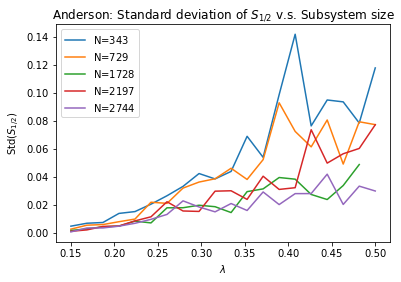

In [29]:
for N in [343, 729, 1728, 2197, 2744]:
    y_ = []
    for lamb in np.linspace(0.05,0.5,20):
        y_.append(data_Anderson[(N,lamb)])
    plt.plot(np.linspace(0.15,0.5,20), y_,label=r"N=$%d$"%N)
plt.legend()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Std($S_{1/2}$)")
plt.title(r"Anderson: Standard deviation of $S_{1/2}$ v.s. Subsystem size")
plt.savefig("std_Anderson.png", dpi=800)